In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Load the mnist dataset 
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Get familiar with the dataset (images in the training and test set)
len(X_train), len(X_test)

(60000, 10000)

In [4]:
#Shape of the training data
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

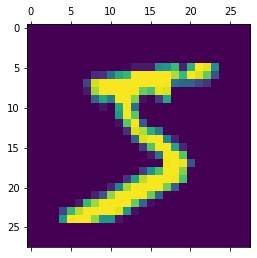

In [6]:
#Now let's look at one of the handwritten images in the training dataset
plt.matshow(X_train[0])

# We need to supply this 8-bit image to the neural network. This image can be represented as a 2-dimensional array with 0 represeting the darkness in the image and 255 represents the white. Then in the end we flatten the array by converting it into a one-dimensional array. Then we propagate it to the neural network.

In [7]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

# We need to normalize the dataset before we proceed. So, that each value is between 0 and 1.

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

# Now, let's look at the 28*28 grid MNIST dataset after the normalization of the training set.

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Flattening the 28*28 grid to a 784 (1-d array) before we feed it for forward propagation.

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
#Now, we can see the change in the shape of our training data to confirm
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Now, we have 784 input neurons. We are building a simple neurtal network for the 10 digit recognition (0-9). So, we need to condense 784 neurons to 10 and then give it to the activation function.

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#             loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256


# Now, let's evaluate the model to evaluate the model on a test dataset.

In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9254


[0.26751968264579773, 0.9254000186920166]

# Let's see the prediction now for any picture in the testset randomly. By looking at the maximum value of any digit for the test image. Let's compare it with the real values.

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[11]

313/313 [==============================] - 0s 1ms/step


array([1.5246322e-02, 1.0984062e-03, 1.5879962e-01, 1.6017457e-02,
       4.6057645e-03, 1.3963791e-03, 8.1950259e-01, 1.3820465e-05,
       3.0714211e-01, 3.3072673e-04], dtype=float32)

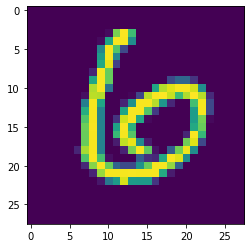

In [16]:
plt.imshow(X_test[11])

In [17]:
np.argmax(y_predicted[11])

6

## Let's check for the first 5 predicted values of the model with the actual values.

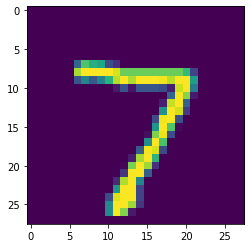

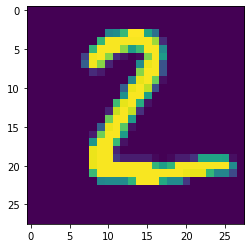

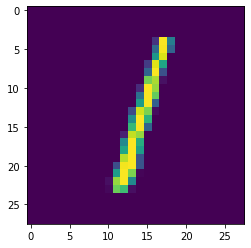

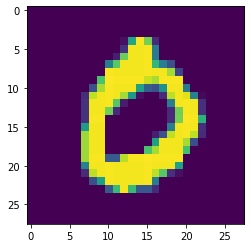

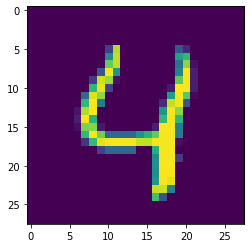

In [19]:
for i in X_test[:5]:
  plt.imshow(i)
  plt.show()

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Now, let's see a confusion matrix to evaluate the performance of the model by understanding what the real value was and what the model predicted.

In [21]:
Conmat = tf.math.confusion_matrix(labels= y_test, predictions = y_predicted_labels)
Conmat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  925,   16,    6,    3,   11,    9,   42,    4],
       [   4,    0,   21,  914,    0,   24,    2,   11,   24,   10],
       [   1,    1,    5,    1,  904,    0,    9,    5,   10,   46],
       [  10,    3,    5,   30,    9,  771,   10,    6,   41,    7],
       [  12,    3,    7,    1,    7,   11,  910,    2,    5,    0],
       [   1,    7,   21,    9,    6,    1,    0,  938,    3,   42],
       [   5,    6,    6,   18,    9,   19,    8,    8,  886,    9],
       [  10,    7,    1,    8,   20,    5,    0,   17,   10,  931]],
      dtype=int32)>

# We will use seaborn library to plot the confusion matrix 

Text(123.0, 0.5, 'Truth')

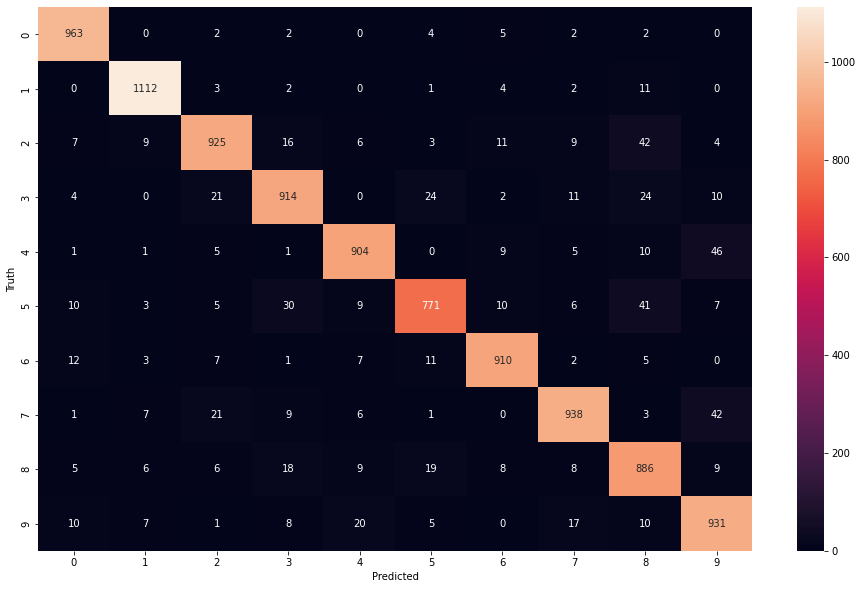

In [22]:
import seaborn as sns 
plt.figure(figsize=(16,10))
sns.heatmap(Conmat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Now, instead of using a simple neural network. Let's see how it changes the accuracy of the model by adding a hidden layer to our neural network.

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),                 #Specify the number of input neurons in the first layer
    keras.layers.Dense(10, activation='sigmoid')                                    #You need to change the hyperparamteres such as hidden layers and nodes in the layer accordingly
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',                               #we can play with activation function, loss, optimizer to get an understanding of how different parameters change the model
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1312 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0701 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0556 - accuracy: 0.9829


#We can see that the accuracy increases with the addition of one hidden layer

In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9717


[0.09115702658891678, 0.9717000126838684]

In [25]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),                 #Specify the number of input neurons in the first layer
    keras.layers.Dense(10, activation='sigmoid')                                    #We use 200 nodes in this case to see the change in accuracy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2349 - accuracy: 0.9321
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0992 - accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0667 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0492 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0373 - accuracy: 0.9879


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9770


[0.07504697889089584, 0.9769999980926514]

## The change in nodes increased the accuracy by a tiny amount. In this way we can add more hidden layers or nodes to see how the accuracy varies.

## Now, if we don't want to do the flattening of the 2-d array everytime in this way. Keras has a library which does the flattening. Also, this time change the epochs to see the difference.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2697 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1219 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9791


[0.07841786742210388, 0.9790999889373779]